In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_iris(return_X_y=True)

In [4]:
#For my Training what will the error graph?
#Training and Testing Accuracy
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


def plot_k_accuracy( train_X, train_y,  test_X, test_y):

  accuracy = []
  train_acc = []

  # we check for k from 1 to 10 
  for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    train_pred = model.predict(train_X)
    score = accuracy_score(test_y, preds)
    accuracy.append(score)
    train_acc.append(accuracy_score(train_y, train_pred))

  fig, ax = plt.subplots(2,1)
  sns.lineplot(x = np.arange(1,100), y = accuracy,ax=ax[0])
  sns.lineplot(x = np.arange(1,100), y = train_acc,ax=ax[1])
  
  fig.show()


(150, 4) (150,)


<ipython-input-4-1f145aae8ca7>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


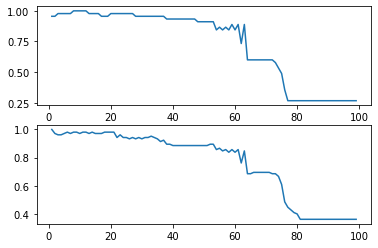

In [5]:
print(X.shape, y.shape)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 24)


plot_k_accuracy(train_X, train_y, test_X, test_y)

## K Fold Cross Validation

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


def plot_k_accuracy( train_X, train_y,  test_X, test_y):

  accuracy = []
  train_acc = []

  # we check for k from 1 to 10 
  for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    score = accuracy_score(test_y, preds)
    accuracy.append(score)

  ax = sns.relplot(x = np.arange(1,100), y = accuracy,ax=ax[0])
  ax.set(xlabel = 'K', ylabel = 'Accuracy')
  plt.show()


In [7]:
from sklearn.model_selection import StratifiedKFold

In [8]:
skf = StratifiedKFold(n_splits=5)

In [9]:
k_dash_fold = 0
results = []

for train_index, test_index in skf.split(X,y):
    
    k_dash_fold +=1
    
    train_X = X[train_index, :]
    train_y = y[train_index]
    test_X = X[train_index, :]
    test_y = y[train_index]

    for k in range(1,12):
        result_dict = {}
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_X,train_y)
        preds = model.predict(test_X)
        score = accuracy_score(test_y,preds)
        result_dict['k_dash'] = k_dash_fold
        result_dict['k'] = k
        result_dict['accuracy'] = score
        results.append(result_dict)
        
    
result_df = pd.DataFrame(results)
result_df

,k_dash,k,accuracy
0,1,1,1.000000
1,1,2,0.975000
2,1,3,0.958333
3,1,4,0.958333
4,1,5,0.966667
5,1,6,0.966667
6,1,7,0.966667
7,1,8,0.975000
8,1,9,0.975000
9,1,10,0.975000


In [10]:
result_df.groupby('k')['accuracy'].mean()

k
1     1.000000
2     0.978333
3     0.960000
4     0.963333
5     0.970000
6     0.973333
7     0.973333
8     0.980000
9     0.978333
10    0.973333
11    0.975000
Name: accuracy, dtype: float64

## Final way to do the things

In [11]:
#1. get the data

X,y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
#split into train and test 
dTrain_x,test_X, dTrain_y,  test_y = train_test_split(X, y , test_size = 0.2, random_state = 24 )



In [13]:
#split into train and validation

k_dash_fold = 0
results = []

for train_index, test_index in skf.split(X,y):
    
    k_dash_fold +=1
    
    train_X = X[train_index, :]
    train_y = y[train_index]
    valid_X = X[train_index, :]
    valid_y = y[train_index]

    for k in range(1,12):
        result_dict = {}
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_X,train_y)
        preds = model.predict(valid_X)
        score = accuracy_score(valid_y,preds)
        result_dict['k_dash'] = k_dash_fold
        result_dict['k'] = k
        result_dict['accuracy'] = score
        results.append(result_dict)
        
    
result_df = pd.DataFrame(results)

result_df.groupby('k')['accuracy'].mean()

k
1     1.000000
2     0.978333
3     0.960000
4     0.963333
5     0.970000
6     0.973333
7     0.973333
8     0.980000
9     0.978333
10    0.973333
11    0.975000
Name: accuracy, dtype: float64

In [14]:
#now to report accuracy we use k = 3

final_model = KNeighborsClassifier(n_neighbors=3)
final_model.fit(dTrain_x,dTrain_y)
preds = final_model.predict(test_X)

print("The accuracy of the model is ", accuracy_score(test_y,preds))

The accuracy of the model is  0.9666666666666667


In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


def plot_k_accuracy1( train_X, train_y,  test_X, test_y):

  accuracy = []

  # we check for k from 1 to 10 
  for k in range(1,12):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    score = accuracy_score(test_y, preds)
    accuracy.append(score)

  sns.lineplot(x = np.arange(1,12), y = accuracy)
  

(150, 4) (150,)


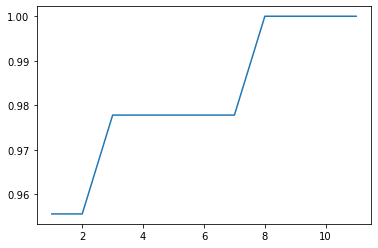

In [16]:
#Optimal error is at 3 that's why k = 3 

print(X.shape, y.shape)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 24)


plot_k_accuracy1(train_X, train_y, test_X, test_y)